# Central Limit Theorem

Let's use the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) in a dataset.

Take a population and measure a value (size, weight, etc.) for each individual.

The important thing to know is that **whatever** the form of the distribution over the population, the distribution of the mean**s** tends to be Gaussian, and its dispersion is given by the Central Limit Theorem.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/IllustrationCentralTheorem.png/400px-IllustrationCentralTheorem.png)

Let's verify this experimentally!

---

## Let's start

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
tips_df = sns.load_dataset('tips')
tips_df

❓ How many rows are available in the dataset?

❓ Plot the `"tip"` column distribution

❓ What is the [**skewness**](https://whatis.techtarget.com/definition/skewness) value of this distribution?

In [0]:
skewness = ? # complete with 'right' or 'left'

<details>
    <summary>👉 Solution:</summary>
    Right skew: Mean exceed mode
</details>

❓ Create variables `mu` and `sigma`, storing the mean and standard deviation of the distribution of tips

### 🧪 Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('distribution',
    skewness=skewness,
    mu=mu,
    sigma=sigma
)
result.write()
print(result.check())

## Sampling mean

❓ Pick randomly and with replacement, 10 rows of the dataset, and compute the mean $\bar{x}$ of that sample.

Run this cell a few times, do you get the same result each time? Is this expected?

❓ Create a `means` list storing a list of means of $N$ samples of size $n$.

Start with $n = 5$ and $N = 10$

In the same cell, **plot** the distribution of `means`. With $n$ constant, increase $N$ and observe. Then increase $n$ and test another range of $N$. What do you observe?

You should observe that:
- `N` (how many times we sample) controls the random noise. When large enough, histograms always look the same when you re-run the cell

- `n` (sample size) controls the shape of the distribution. When large enough, it *converges* toward a Normal distribution. This is the Central Limit Theorem


❓ Let's verify the Central Limit Theorem computationally:
- Compare `mu` with the mean of means
- Compare `sigma` with the standard deviation of the means, but don't forget the $\sqrt n$ adjustment
- Compute the `skewness` of the distribution of the means using `scipy.stats.skew` (should be close to 0)
- Compute the `kurtosis` of the distribution of the means using `scipy.stats.kurtosis`(should be close to 0)


In [0]:
from scipy.stats import skew, kurtosis
### YOUR CODE HERE

## Probability

❓❓❓ This is the main problem we want to solve: imagine we randomly pick 100 dinners from the dataset (with replacement). What is the probability that the sum of the cumulated tips is **greater than 350€**?

---

❓ First, start by familiarizing yourself with `scipy.stats.norm.pdf`: Can you plot a Normal Distribution with a mean and standard deviation of your choice?

In [0]:
from scipy.stats import norm
mu_test = ? 
sigma_test = ?  
norm_test = norm(mu_test, scale=sigma_test)

### your plot below

❓Back to our exercise:

- We draw a sample of size 100 out of the global population of dinners, with $\mu=3€$ and $\sigma=1.38€$
- We observe the sum of this 100-sample tips is 350€, so the mean-tip $\mu_X$ is 3.5€.

- Can you guess what would be the **shape** of the **distribution of the means** of these samples **if we were to draw many other samples** of the same size like this one? (What about its form, mean, and standard deviation?)

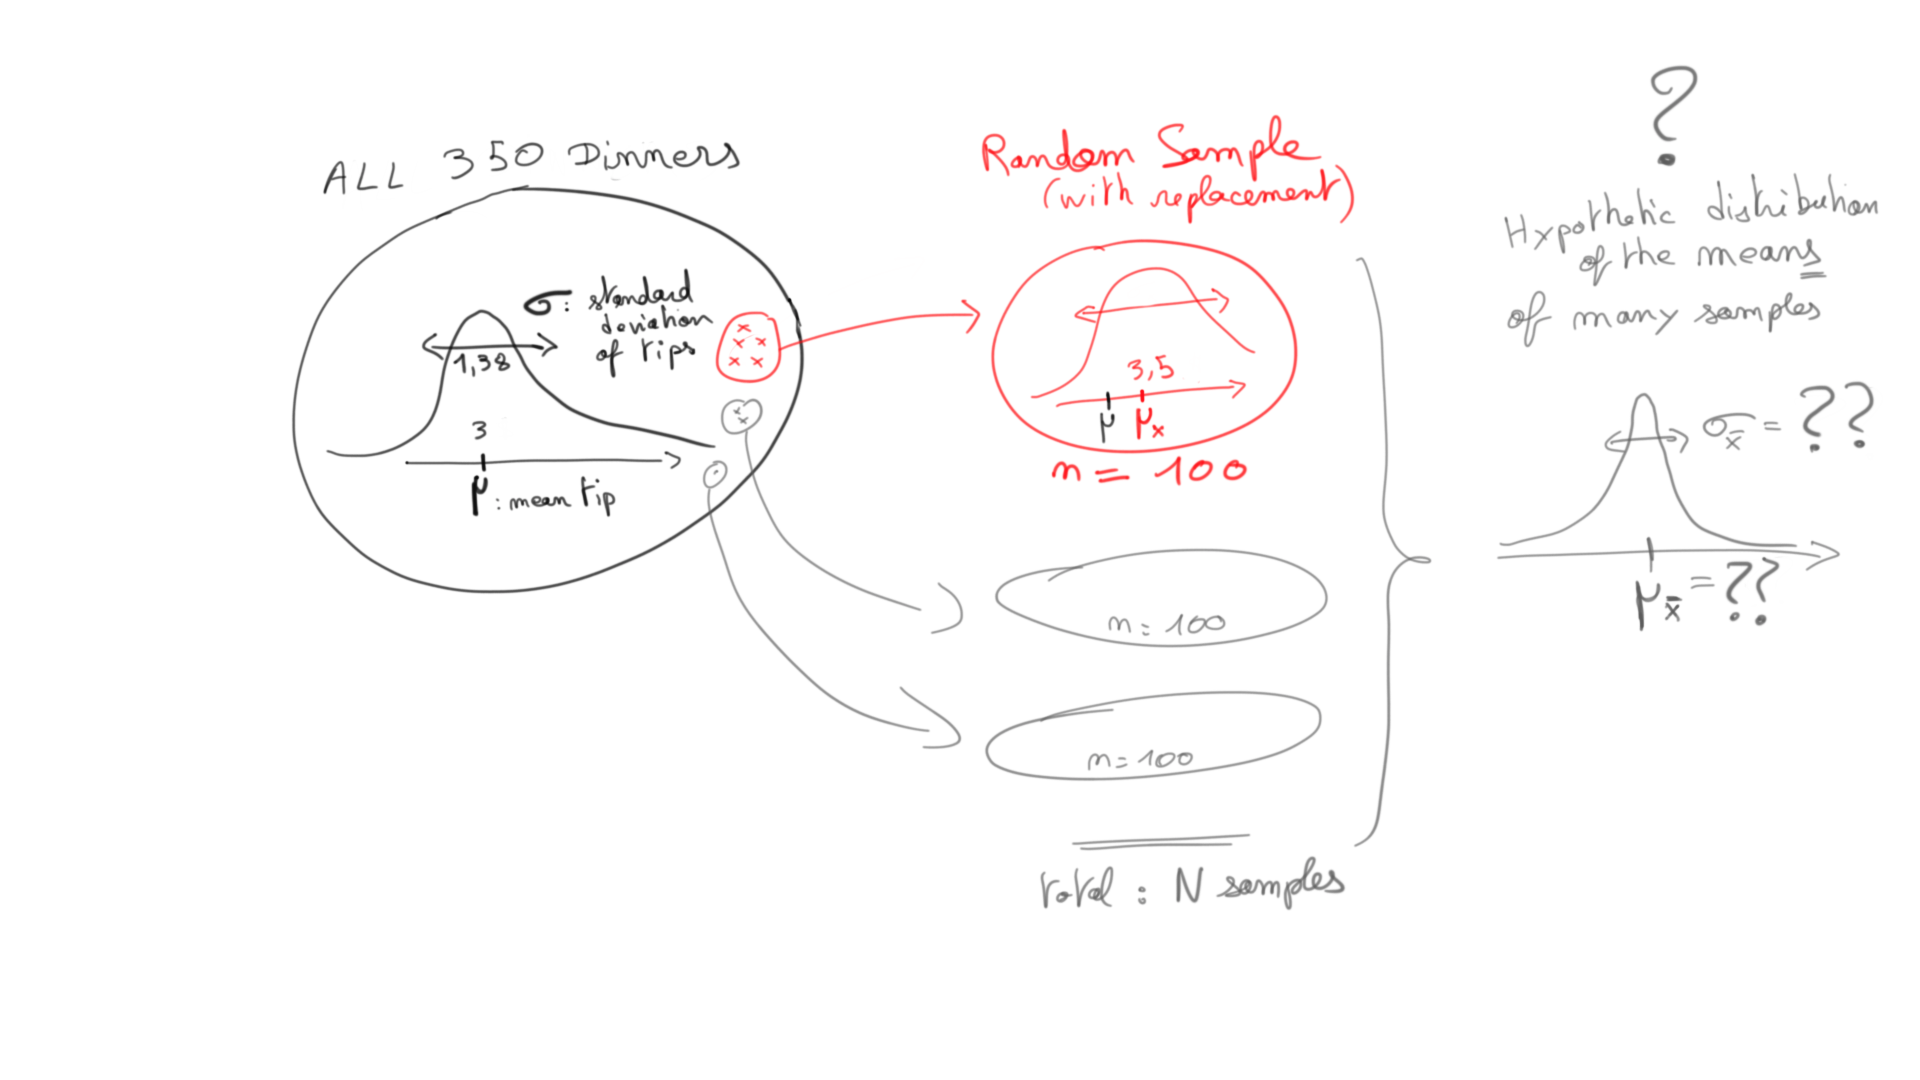

<details>
    <summary>💡 Hint</summary>

Our sample of size `n=100` can be considered large enough to apply the Central Limit Theorem (CLT): if we were going to repeat this experiment (randomly picking a sample of size 100) infinitely many times, the distribution of sample mean**s** would become exactly a normal distribution, with mean (???) and standard deviation (???)
</details>

❓Great, now try to plot it. Once it's done, add on the same figure the datapoint representing specifically a cumulated tip of 350€ over 100 dinners.

In [0]:
### YOUR CODE HERE
mu_expected = ?
sigma_expected = 
norm_expected = ?

# Your plot below

Clearly, we see visually that such mean tips over 100 dinners is virtually impossible. Let's compute it:

❓ We're almost there! Use the cumulative distribution function `cdf` from [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) module to try to compute numerically the **probability** we are looking for:

In [0]:
# Compute the probability and store it in a `proba_350` variable

If we had really observed such an amount, we could also say with 99.98% confidence that the 100 dinners selected were NOT a mere random sample from the population of dinners.

### 🧪 Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('probability',
    n=100,
    mu_expected=mu_expected,
    mu=mu,
    sigma_expected=sigma_expected,
    sigma=sigma,
    proba=proba_350
)
result.write()
print(result.check())

### Alternative computation using z-score
Imagine you didn't have access to the scipy library (or even to a computer) to compute numerically the probability density function of a custom-made normal distribution. How would we compute it? 

Instead of computing a normal distribution with specific mean and sigma, a much more elegant way is to rephrase our problem to use the **Standard normal distribution** $\mathcal N(0,1)$, from which we could read usual values from a **standard statistical table** (see below)

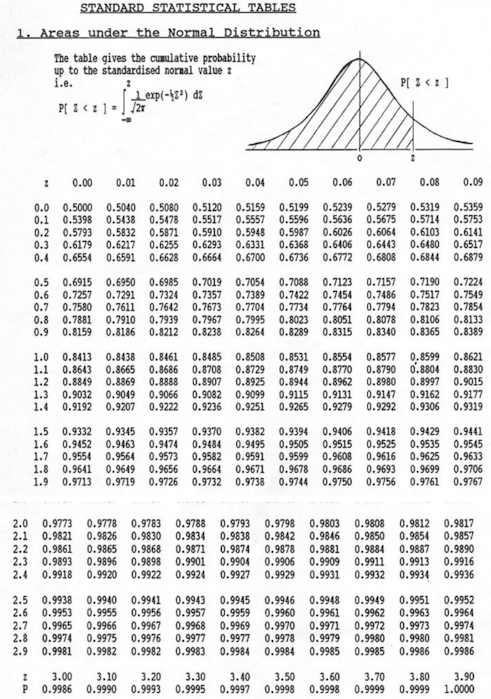

❓First, compute the [z-score](https://en.wikipedia.org/wiki/Standard_score) of your observation (sample size = 100, mean = 3.5€).

The z-score of a measured observation $x$ is simply the value of the observation, **measured by the number of standard deviations above or below the mean** of the underlying distribution from which the observation is derived.

$$z={x-\mu  \over \sigma }$$

This allows us to change perspective from $\mathcal N(\mu,\sigma)$ to $\mathcal N(0,1)$

<details>
    <summary>💡 Hint</summary>
In our case, the value we observe is "3.5€", and the underlying distribution from which this observation was made is the means of samples of size 100, which is normal with mean $\mu$ and std $\sigma \over \sqrt{100}$
according to the CLT

</details>

In [0]:
### Compute the z-score and store it in a `z` variable

❓Use the standard table above to compute the probability we are looking for. Double check with `scipy.stats.norm` as done previously.

> YOUR ANSWER HERE

In [0]:
### Compute the probability from the z-score and store it in a `proba_z` variable

### 🧪 Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('zscore',
    z=z,
    proba=proba_z
)
result.write()
print(result.check())